# 연관 분석 알고리즘

## Apriori 알고리즘

In [2]:
import mlxtend
import pandas as pd
import numpy as np

In [7]:
mybag = np.array([
    ['우유', '기저귀', '쥬스'],
    ['양상추', '기저귀', '맥주'],
    ['우유', '양상추', '기저귀', '맥주'],
    ['양상추', '맥주']
], dtype=object)

In [11]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_arr = te.fit(mybag).transform(mybag) #Sparse Matrix로 변환 (Transaction matrix)
df = pd.DataFrame(te_arr, columns=te.columns_)
df

,기저귀,맥주,양상추,우유,쥬스
0,True,False,False,True,True
1,True,True,True,False,False
2,True,True,True,True,False
3,False,True,True,False,False


In [13]:
%%time
from mlxtend.frequent_patterns import apriori

apriori(df, min_support = 0.5, use_colnames = True)

CPU times: user 3.19 ms, sys: 1.32 ms, total: 4.51 ms
Wall time: 5.33 ms


,support,itemsets
0,0.75,(기저귀)
1,0.75,(맥주)
2,0.75,(양상추)
3,0.50,(우유)
4,0.50,"(맥주, 기저귀)"
5,0.50,"(양상추, 기저귀)"
6,0.50,"(기저귀, 우유)"
7,0.75,"(맥주, 양상추)"
8,0.50,"(맥주, 양상추, 기저귀)"


## FP-Growth

In [14]:
import mlxtend
import pandas as pd
import numpy as np

In [16]:
mybag = np.array([
    ['우유', '기저귀', '쥬스'],
    ['양상추', '기저귀', '맥주'],
    ['우유', '양상추', '기저귀', '맥주'],
    ['양상추', '맥주']
], dtype=object)

In [17]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_arr = te.fit(mybag).transform(mybag) #Sparse Matrix로 변환 (Transaction matrix)
df = pd.DataFrame(te_arr, columns=te.columns_)
df

,기저귀,맥주,양상추,우유,쥬스
0,True,False,False,True,True
1,True,True,True,False,False
2,True,True,True,True,False
3,False,True,True,False,False


In [18]:
%%time

from mlxtend.frequent_patterns import fpgrowth

fpgrowth(df, min_support = 0.5, use_colnames = True)

CPU times: user 1.73 ms, sys: 1.59 ms, total: 3.33 ms
Wall time: 3.25 ms


,support,itemsets
0,0.75,(기저귀)
1,0.50,(우유)
2,0.75,(양상추)
3,0.75,(맥주)
4,0.50,"(맥주, 기저귀)"
5,0.50,"(양상추, 기저귀)"
6,0.50,"(맥주, 양상추, 기저귀)"
7,0.50,"(기저귀, 우유)"
8,0.75,"(맥주, 양상추)"


In [23]:
from mlxtend.frequent_patterns import association_rules
association_rules(fpgrowth(df, min_support = 0.5, use_colnames = True), metric = 'confidence', min_threshold = 0.5, support_only = False)

#min_threshold : minimal confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(맥주),(기저귀),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75,-0.333333
1,(기저귀),(맥주),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75,-0.333333
2,(양상추),(기저귀),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75,-0.333333
3,(기저귀),(양상추),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75,-0.333333
4,"(맥주, 양상추)",(기저귀),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75,-0.333333
5,"(맥주, 기저귀)",(양상추),0.50,0.75,0.50,1.000000,1.333333,0.1250,inf,0.500000
6,"(양상추, 기저귀)",(맥주),0.50,0.75,0.50,1.000000,1.333333,0.1250,inf,0.500000
7,(맥주),"(양상추, 기저귀)",0.75,0.50,0.50,0.666667,1.333333,0.1250,1.50,1.000000
8,(양상추),"(맥주, 기저귀)",0.75,0.50,0.50,0.666667,1.333333,0.1250,1.50,1.000000
9,(기저귀),"(맥주, 양상추)",0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75,-0.333333


# 컨텐츠 기반 추천 알고리즘


## TF-IDF 알고리즘

TF : 특정 문서 내 특정 단어의 출현 횟수
DF : 전체 문서에서 특정 문서 등장 문서 횟수 

IDF : DF의 패널티 가중치 버전 log(n/(df + 1))

TF * IDF 로 문서 내 중요한 단어를 추출해낼 수 있음

In [24]:
docs = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [36]:
countvect = cv.fit_transform(docs)
countvect

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [43]:
countvect.toarray()

## 일단 docs의 띄어쓰기 기준

array([[0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1]])

In [39]:
cv.vocabulary_

{'먹고': 3,
 '싶은': 6,
 '사과': 5,
 '바나나': 4,
 '길고': 1,
 '노란': 2,
 '저는': 7,
 '과일이': 0,
 '좋아요': 8}

In [40]:
sorted(cv.vocabulary_)

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfdiv = TfidfVectorizer(use_idf= True, smooth_idf=False, norm=None).fit(docs)
tfdiv_df = pd.DataFrame(tfdiv.transform(docs).toarray(), columns = sorted(cv.vocabulary_))
tfdiv_df

## 여기서 idf : log(n/df(t)) + 1

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,1.693147,0.000000,2.386294,1.693147,0.000000,0.000000
1,0.000000,0.000000,0.000000,1.693147,1.693147,0.000000,1.693147,0.000000,0.000000
2,0.000000,2.386294,2.386294,0.000000,3.386294,0.000000,0.000000,0.000000,0.000000
3,2.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.386294,2.386294


In [28]:
print(sorted(tfdiv.vocabulary_)) 

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']


### Moive Metadata 실습

In [48]:
data = pd.read_csv('archive/movies_metadata.csv', low_memory=False)

In [49]:
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [50]:
data['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [51]:
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [52]:
data = data[data['overview'].notnull()].reset_index(drop=True) #결측치가 없는 행만 갖고옴

In [53]:
data = data.loc[0:20000].reset_index(drop=True)

In [54]:
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [57]:
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(data['overview'])
print(tfidf_matrix)

  (0, 11693)	0.13948662069753054
  (0, 2823)	0.15253291277906278
  (0, 24415)	0.10257725584833557
  (0, 14449)	0.10302132796228398
  (0, 12972)	0.13364765644472912
  (0, 30892)	0.1035412453845582
  (0, 37921)	0.13277376337322697
  (0, 8009)	0.12961708339584402
  (0, 32544)	0.13306082878629863
  (0, 19121)	0.10483322426370685
  (0, 32411)	0.09628099663501492
  (0, 25320)	0.12027061690901478
  (0, 1258)	0.14902377050776017
  (0, 37308)	0.11704348553642356
  (0, 24849)	0.19561613951289086
  (0, 6315)	0.5038757814872474
  (0, 5798)	0.10956808818504292
  (0, 4756)	0.12585835911124546
  (0, 36324)	0.11518914534363385
  (0, 18801)	0.13364765644472912
  (0, 25048)	0.09143046124489661
  (0, 43290)	0.15497891517170792
  (0, 2059)	0.41611241981147584
  (0, 46790)	0.46493674551512376
  (0, 24451)	0.10939074744402247
  :	:
  (20000, 8041)	0.17959482610333966
  (20000, 26541)	0.15404155635445826
  (20000, 16)	0.15013245104684358
  (20000, 14949)	0.15117670290398819
  (20000, 39637)	0.158095667004319

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

cosine_matrix.shape

(20001, 20001)

In [61]:
np.round(cosine_matrix, 4)

array([[1.    , 0.0158, 0.    , ..., 0.0083, 0.0172, 0.    ],
       [0.0158, 1.    , 0.0492, ..., 0.0057, 0.008 , 0.    ],
       [0.    , 0.0492, 1.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.0083, 0.0057, 0.    , ..., 1.    , 0.0144, 0.    ],
       [0.0172, 0.008 , 0.    , ..., 0.0144, 1.    , 0.0183],
       [0.    , 0.    , 0.    , ..., 0.    , 0.0183, 1.    ]])

In [62]:
#cosine matricx 
#인덱스 0, 1, 2 .... 2001 -> 영화 이름으로 바꿔줌

movieid = {}
for i, c in enumerate(data['title']):
    movieid[i] = c
movieid

{0: 'Toy Story',
 1: 'Jumanji',
 2: 'Grumpier Old Men',
 3: 'Waiting to Exhale',
 4: 'Father of the Bride Part II',
 5: 'Heat',
 6: 'Sabrina',
 7: 'Tom and Huck',
 8: 'Sudden Death',
 9: 'GoldenEye',
 10: 'The American President',
 11: 'Dracula: Dead and Loving It',
 12: 'Balto',
 13: 'Nixon',
 14: 'Cutthroat Island',
 15: 'Casino',
 16: 'Sense and Sensibility',
 17: 'Four Rooms',
 18: 'Ace Ventura: When Nature Calls',
 19: 'Money Train',
 20: 'Get Shorty',
 21: 'Copycat',
 22: 'Assassins',
 23: 'Powder',
 24: 'Leaving Las Vegas',
 25: 'Othello',
 26: 'Now and Then',
 27: 'Persuasion',
 28: 'The City of Lost Children',
 29: 'Shanghai Triad',
 30: 'Dangerous Minds',
 31: 'Twelve Monkeys',
 32: 'Babe',
 33: 'Carrington',
 34: 'Dead Man Walking',
 35: 'Across the Sea of Time',
 36: 'It Takes Two',
 37: 'Clueless',
 38: 'Cry, the Beloved Country',
 39: 'Richard III',
 40: 'Dead Presidents',
 41: 'Restoration',
 42: 'Mortal Kombat',
 43: 'To Die For',
 44: 'How To Make An American Quilt',
 

In [64]:
idmovie = {}

for i, c in movieid.items(): idmovie[c] = i
idmovie

{'Toy Story': 0,
 'Jumanji': 1,
 'Grumpier Old Men': 2,
 'Waiting to Exhale': 3,
 'Father of the Bride Part II': 4,
 'Heat': 14628,
 'Sabrina': 876,
 'Tom and Huck': 7,
 'Sudden Death': 8,
 'GoldenEye': 9,
 'The American President': 10,
 'Dracula: Dead and Loving It': 11,
 'Balto': 12,
 'Nixon': 13,
 'Cutthroat Island': 14,
 'Casino': 15,
 'Sense and Sensibility': 16,
 'Four Rooms': 17,
 'Ace Ventura: When Nature Calls': 18,
 'Money Train': 19,
 'Get Shorty': 20,
 'Copycat': 21,
 'Assassins': 22,
 'Powder': 23,
 'Leaving Las Vegas': 24,
 'Othello': 15281,
 'Now and Then': 26,
 'Persuasion': 14779,
 'The City of Lost Children': 28,
 'Shanghai Triad': 29,
 'Dangerous Minds': 30,
 'Twelve Monkeys': 31,
 'Babe': 32,
 'Carrington': 33,
 'Dead Man Walking': 34,
 'Across the Sea of Time': 35,
 'It Takes Two': 36,
 'Clueless': 37,
 'Cry, the Beloved Country': 38,
 'Richard III': 17618,
 'Dead Presidents': 40,
 'Restoration': 41,
 'Mortal Kombat': 42,
 'To Die For': 43,
 'How To Make An America

In [66]:
idx = idmovie['Toy Story']
idx

0

In [70]:
cosine_matrix[0]

array([1.        , 0.015775  , 0.        , ..., 0.00826973, 0.01721372,
       0.        ])

In [72]:
sim_scores = [(i, c) for i, c in enumerate(cosine_matrix[idx]) if i!= idx]
sim_scores_sorted = sorted(sim_scores, key = lambda x: x[1], reverse=True) #x[1] : value로 정렬, reverse : 내림차순

toystory_simscore = [(movieid[i], score) for i, score in sim_scores_sorted[0:10]]
toystory_simscore

[('Toy Story 3', 0.5262275451171008),
 ('Toy Story 2', 0.46327679983038106),
 ('The 40 Year Old Virgin', 0.27973904760756324),
 ('The Champ', 0.2007853866431695),
 ('Rebel Without a Cause', 0.18287334034120217),
 ('For Your Consideration', 0.15712074193481165),
 ('Condorman', 0.15288512626542436),
 ('Man on the Moon', 0.14334504080515542),
 ('Malice', 0.1376522510843668),
 ('Factory Girl', 0.13370326938690444)]

## Word2Vec

### CBOW Class 구현

주변 단어를 통해 중심단어를 유추하는 신경망 기반 알고리즘

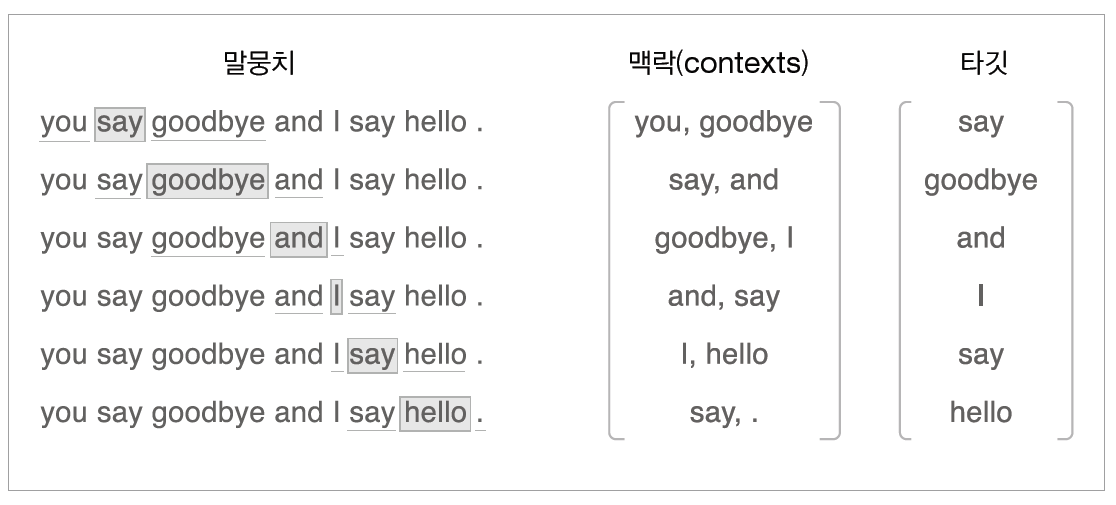

In [9]:
train_data = [
  "진짜 맛있어요. 강추강추",
  "안가면 손해, 맛집이에요.",
  "리뷰보고 갔는데 생각했던거와 다르네요.",
  "최고에요! 다음에 또 오겠습니다.",
  "주방 위생이 별로인거 같아요. 신경좀 쓰셔야 할듯..",
  "중요한 날에 방문했는데 서비스가 좋아서 만족했습니다! 맛도 괜찮아요",
  "생각보다 비싸요.. 가성비는 별로네요",
  "재방문의사 100프로!!",
  "서비스가 좋아요~ 친절하시네요!",
  "청소는 하시나요... 매장이 조금 더럽네요,,",
  "두번 다시 안갈듯.. 별로별로"
  "음식도 형편없고, 가격도 비싸요.",
  "음식 맛있어요! 가성비 괜찮은듯!"]

test_words = ['음식', '맛', '서비스', '위생', '가격']

In [22]:
from tqdm import tqdm
from konlpy.tag import Okt
from torch import nn
from torch.utils.data import Dataset, DataLoader
from collections import defaultdict

import torch

In [23]:
tokenizer = Okt() # Twitter(Okt) tokenizer를 사용하여 토큰화 진행

def make_tokenized(data) :
    tokenized = []
    for sent in tqdm(data):
        tokens = tokenizer.morphs(sent, stem = True) # 형태소 단위로 문장 토큰화하고, stem = True로 줌으로서, 각 단어의 어간을 추출한다.
        tokenized.append(tokens)
    return tokenized

train_tokenized = make_tokenized(train_data)

100%|██████████| 12/12 [00:00<00:00, 328.01it/s]


In [ ]:
train_tokenized

In [25]:
word_count = defaultdict(int) # 가장 많이 등장한 token 순서대로 dict형태로 나열한다.
for tokens in tqdm(train_tokenized) :
    for token in tokens :
        word_count[token] += 1
word_count = sorted(word_count.items(), key = lambda x: x[1], reverse = True)

word2idx = {} # 가장 많이 등장한 token 순서대로 index를 주어 Vocab 생성
for word, count in tqdm(word_count) :
    if word not in word2idx :
        word2idx[word] = len(word2idx)

100%|██████████| 74/74 [00:00<00:00, 1014308.81it/s]


In [26]:
word2idx

{'.': 0,
 '!': 1,
 '하다': 2,
 '별로': 3,
 '..': 4,
 '도': 5,
 '맛있다': 6,
 '안': 7,
 '가다': 8,
 ',': 9,
 '생각': 10,
 '에': 11,
 '이': 12,
 '방문': 13,
 '서비스': 14,
 '가': 15,
 '좋다': 16,
 '괜찮다': 17,
 '비싸다': 18,
 '가성': 19,
 '음식': 20,
 '진짜': 21,
 '강': 22,
 '추강': 23,
 '추': 24,
 '손해': 25,
 '맛집': 26,
 '이에요': 27,
 '리뷰': 28,
 '보고': 29,
 '다르다': 30,
 '최고': 31,
 '에요': 32,
 '다음': 33,
 '또': 34,
 '오다': 35,
 '주방': 36,
 '위생': 37,
 '인거': 38,
 '같다': 39,
 '신경': 40,
 '좀': 41,
 '쓸다': 42,
 '중요하다': 43,
 '날': 44,
 '만족하다': 45,
 '맛': 46,
 '보다': 47,
 '비다': 48,
 '네': 49,
 '요': 50,
 '재': 51,
 '의사': 52,
 '100': 53,
 '프로': 54,
 '!!': 55,
 '~': 56,
 '친절하다': 57,
 '청소': 58,
 '는': 59,
 '...': 60,
 '매장': 61,
 '조금': 62,
 '더럽다': 63,
 ',,': 64,
 '두': 65,
 '번': 66,
 '다시': 67,
 '갈다': 68,
 '형편': 69,
 '없다': 70,
 '가격': 71,
 '비': 72,
 '듯': 73}

In [27]:
#CBOW dataset 정의

class CBOWDataset(Dataset) :
    def __init__(self, train_tokenized, vocab, window_size = 2) :
        self.x = []
        self.y = []
        
        for tokens in tqdm(train_tokenized) :
            token_ids = [vocab[token] for token in tokens] #word to index
            for i, id in enumerate(token_ids) : # CBOW 예측 방법 적용. 주변 단어를 바탕으로 중심 단어 예측
                if i-window_size >= 0 and i+window_size < len(token_ids) :
                    self.x.append(token_ids[i-window_size:i] + token_ids[i+1 : i+window_size+1]) # i번째 단어에 대한 주변 단어의 인덱스를 x에 추가
                    self.y.append(id) # i번째 단어에 대한 index를 y에 추가
        
        self.x = torch.LongTensor(self.x) # 64bit integer type으로 변환
        self.y = torch.LongTensor(self.y)
    
    def __len__(self) :
        return self.x.shape[0]
    
    def __getitem__(self, idx) :
        return self.x[idx], self.y[idx]

In [29]:
cbow_set = CBOWDataset(train_tokenized, word2idx)
cbow_set

100%|██████████| 12/12 [00:00<00:00, 99864.38it/s]


In [33]:
# self.embedding : vocab_size 크기의 one-hot vector를 유사도를 구하기 위한 분산 표현을 나타내기 위해 특정 크기의 dimension으로 embedding하는 layer
# self.linear : 변환된 embedding vector를 원래 vocab_size로 바꾸는 layer

class CBOW(nn.Module) :
    def __init__(self, vocab_size, dim) :
        super(CBOW, self).__init__()
        self.embedding = nn.Embedding(vocab_size, dim, sparse = True) # sparse = True를 이용해, matrix에서 0인 부분을 제외하고 계산한다.
        self.linear = nn.Linear(dim, vocab_size)
        
    def forward(self, x) : 
        embeddings = self.embedding(x) # x를 one-hot vector가 아닌 embedding vector로 변환한다.
        embeddings = torch.sum(embeddings, dim = 1) # window에 있는 단어들에 대한 값을 합친다.
        output = self.linear(embeddings)
        return output

In [34]:
cbow = CBOW(vocab_size = len(word2idx), dim = 256)

batch_size = 4

cbow_loader = DataLoader(cbow_set, batch_size = batch_size)

In [ ]:
learning_rate = 5e-4
num_epochs = 100
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = cbow
loader = cbow_loader

model.train()
model = model.to(device)
optim = torch.optim.SGD(cbow.parameters(), lr = learning_rate)
loss_function = nn.CrossEntropyLoss()

for e in range(1, num_epochs + 1) :
    print(f"Epoch: {e}")
    for batch in tqdm(loader) :
        x, y = batch
        print(y)
        x, y = x.to(device), y.to(device)
        output = model(x)
        
        optim.zero_grad()
        loss = loss_function(output, y)
        loss.backward()
        optim.step()
    
    print(f"Train loss per epoch: {loss.item()}")
print('Finished')

In [38]:
for word in test_words :
    input_id = torch.LongTensor([word2idx[word]]).to(device)
    emb = model.embedding(input_id)
    
    print(f"Word: {word}")
    print(max(emb.squeeze(0)))

Word: 음식
tensor(3.0984, grad_fn=<UnbindBackward0>)
Word: 맛
tensor(2.4948, grad_fn=<UnbindBackward0>)
Word: 서비스
tensor(3.4550, grad_fn=<UnbindBackward0>)
Word: 위생
tensor(3.3996, grad_fn=<UnbindBackward0>)
Word: 가격
tensor(3.4366, grad_fn=<UnbindBackward0>)


### CBOW, Skip-gram 예제 데이터 활용 구현

In [25]:
from gensim.models import Word2Vec
import pandas as pd
import numpy as np

In [13]:
movie = pd.read_csv('archive/ratings.csv', low_memory = True)
movie.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [10]:
meta = pd.read_csv('archive/movies_metadata.csv', low_memory=False)
meta

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [15]:
meta = meta.rename(columns = {'id' : 'movieId'})
movie['movieId'] = movie['movieId'].astype('str')
meta['movieId'] = meta['movieId'].astype('str')


In [16]:
movie = pd.merge(movie, meta[['original_title', 'movieId']], how='left', on ='movieId')

In [17]:
movie.head()

,userId,movieId,rating,timestamp,original_title
0,1,110,1.0,1425941529,Trois couleurs : Rouge
1,1,147,4.5,1425942435,Les Quatre Cents Coups
2,1,858,5.0,1425941523,Sleepless in Seattle
3,1,1221,5.0,1425941546,NaN
4,1,1246,5.0,1425941556,Rocky Balboa


In [20]:
movie = movie[movie['original_title'].notnull()].reset_index(drop=True)

In [23]:
agg = movie.groupby(['userId'])['original_title'].agg({'unique'})
agg

,unique
userId,
1,"[Trois couleurs : Rouge, Les Quatre Cents Coup..."
2,"[Four Rooms, Jarhead, Pirates of the Caribbean..."
3,"[Monsoon Wedding, Reservoir Dogs, Once Were Wa..."
4,"[Rebecca, Batman & Robin, La belle et la bête,..."
5,"[Star Trek III: The Search for Spock, Terminat..."
...,...
270892,"[Lost in Translation, Back to the Future Part ..."
270893,"[Million Dollar Baby, Trois couleurs : Rouge, ..."
270894,"[Dancer in the Dark, The 39 Steps, A River Run..."


영화 명 하나를 단어로 보고, 어떤 영화를 순서대로 보았는지 그 유사도를 보자고 한다! 

Word2Vec을 통해 주변 영화들이 어떤 영화가 나오는 지 유사도를 파악하자!

In [31]:
sentence = []
for user_sentence in agg['unique'].values:
    sentence.append(list(map(str, user_sentence)))

In [39]:
sentence

[['Trois couleurs : Rouge',
  'Les Quatre Cents Coups',
  'Sleepless in Seattle',
  'Rocky Balboa',
  'Fools Rush In',
  'Young and Innocent',
  'License to Wed',
  'Shriek If You Know What I Did Last Friday the Thirteenth',
  'Shuang ma lian huan',
  'Confession of a Child of the Century',
  'Cesare deve morire'],
 ['Four Rooms',
  'Jarhead',
  "Pirates of the Caribbean: Dead Man's Chest",
  'Hable con ella',
  '英雄',
  'Donnie Darko',
  'The 39 Steps',
  'Night on Earth',
  'A Nightmare on Elm Street',
  'The Matrix Revolutions',
  'Interview with the Vampire',
  'La belle et la bête',
  'Monty Python and the Holy Grail',
  "La passion de Jeanne d'Arc",
  'Almost Famous',
  'Mrs. Doubtfire',
  'Parenthood'],
 ['Monsoon Wedding',
  'Reservoir Dogs',
  'Once Were Warriors',
  'Sleepless in Seattle',
  'The Third Man',
  'Fools Rush In',
  'I Love You to Death',
  'My Super Ex-Girlfriend'],
 ['Rebecca',
  'Batman & Robin',
  'La belle et la bête',
  'The Departed',
  'Meet the Parents',


In [37]:
from gensim.models import Word2Vec
embedding_model = Word2Vec(sentences= sentence, window=5, min_count=1, workers=4, sg=1)

#size = weight 크기
#workers : CPU 자원 개수
#sg : 0 - CBOW, 1 - Skip-gram


In [41]:
embedding_model.wv.most_similar(positive=['Star Trek III: The Search for Spock'], topn=10)

[('Der bewegte Mann', 0.9079453945159912),
 ('The Dark Knight', 0.8609672784805298),
 ('Les Quatre Cents Coups', 0.8556870222091675),
 ('アキラ', 0.8349801301956177),
 ('Star Trek II: The Wrath of Khan', 0.8345692753791809),
 ('Der Himmel über Berlin', 0.8303064703941345),
 ('The Secret Life of Words', 0.8277405500411987),
 ('La Boum', 0.8248085975646973),
 ('Edward Scissorhands', 0.8040010333061218),
 ('The Rolling Stones: Gimme Shelter', 0.8039331436157227)]